In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-white')

In [2]:
titanic_train = pd.read_csv('train.csv')
# titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
titanic_train[titanic_train['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
titanic_train.drop(index=[61,829],inplace=True)

In [9]:
mean_age = round((titanic_train.Age.mean()),1)
mean_age

29.6

In [10]:
titanic_train['Age'] = titanic_train.Age.fillna(mean_age)
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
titanic_train.drop('Cabin',inplace=True,axis=1)
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [13]:
print(titanic_train.Age.min())
print(titanic_train.Age.max())

0.42
80.0


In [14]:
titanic_train['Age_Range'] = pd.cut(titanic_train.Age,range(0,81,10))

In [15]:
titanic_train[titanic_train['Age']==10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Range
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,S,"(0, 10]"
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,S,"(0, 10]"


In [16]:
titanic_train[titanic_train['Age']==11].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Range
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,S,"(10, 20]"
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S,"(10, 20]"


In [17]:
age_range_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
titanic_train['Age_Range'] = pd.cut(titanic_train.Age,range(0,81,10),labels=age_range_labels)

In [18]:
titanic_train[titanic_train['Age']==10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Range
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,S,0-10
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,S,0-10


In [19]:
titanic_train[titanic_train['Age']==11].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Range
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,S,11-20
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S,11-20


<IPython.core.display.Javascript object>


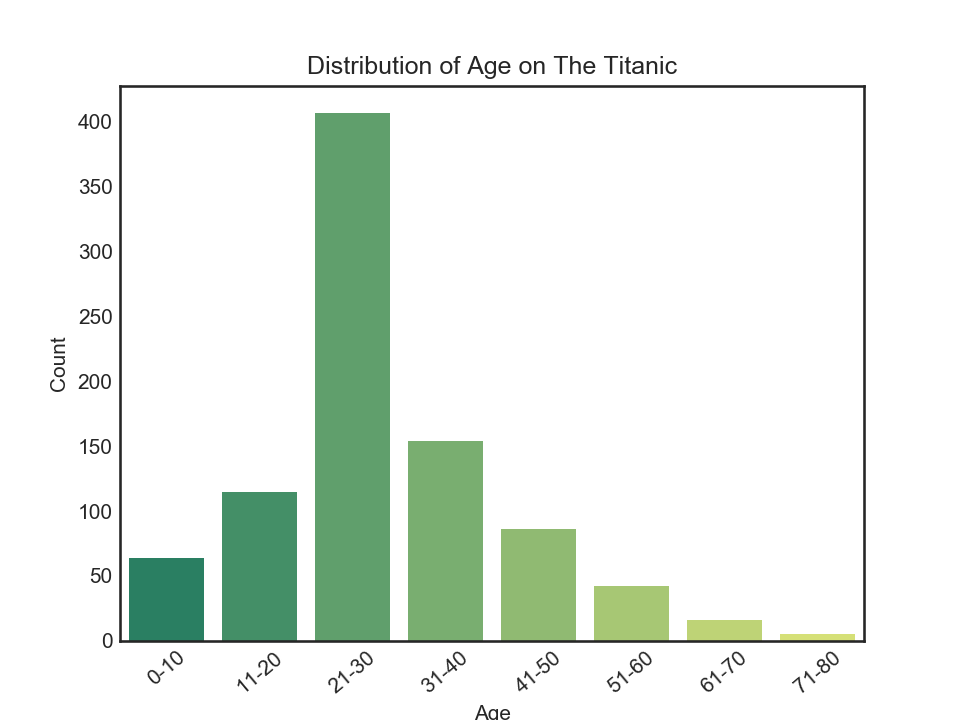

In [20]:
plt.figure()
sns.countplot(titanic_train['Age_Range'],palette='summer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age on The Titanic')
plt.xticks(rotation=40);

In [ ]:
titanic_train.groupby(['Sex','Age_Range']).Survived.mean().reset_index()

In [21]:
titanic_train.groupby('Sex').Survived.mean().reset_index()

,Sex,Survived
0,female,0.740385
1,male,0.188908


<IPython.core.display.Javascript object>


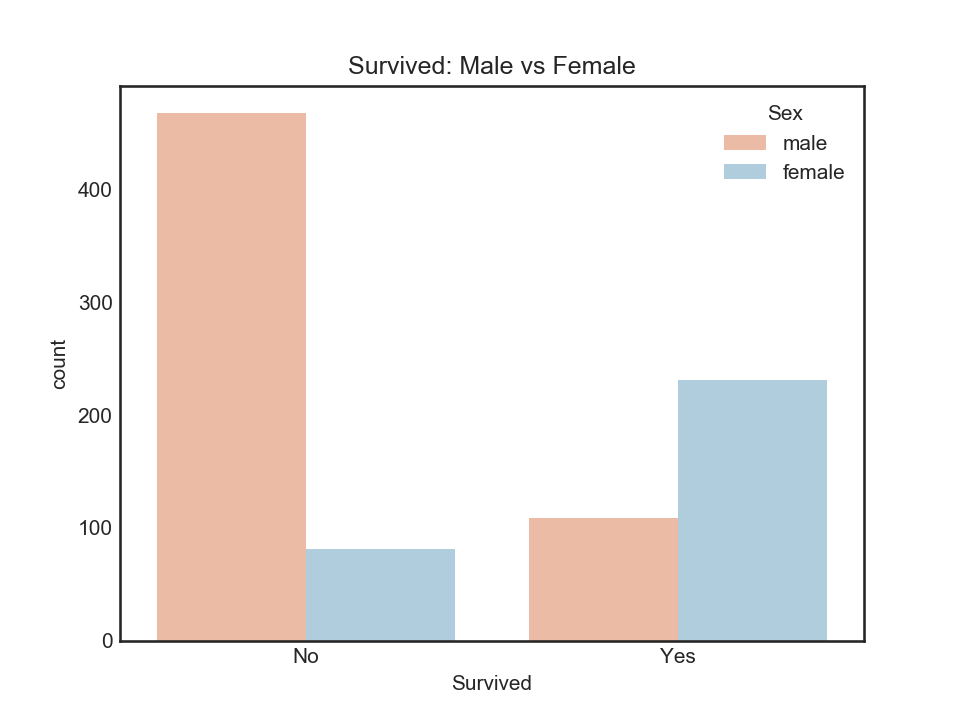

In [22]:
plt.figure()
sns.countplot(x=titanic_train['Survived'],hue=titanic_train['Sex'],palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.title('Survived: Male vs Female');

In [24]:
died = titanic_train[titanic_train.Survived == 0]
lived = titanic_train[titanic_train.Survived == 1]

<IPython.core.display.Javascript object>


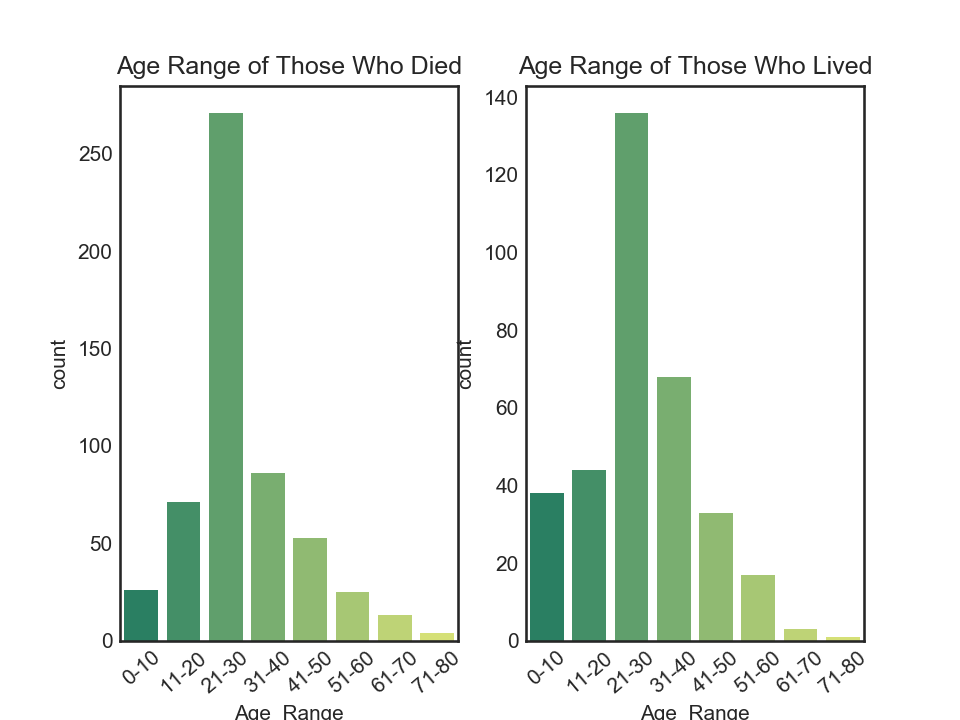

In [25]:
plt.figure()
plt.subplot(1,2,1)
sns.countplot(died['Age_Range'],palette='summer')
plt.title('Age Range of Those Who Died')
plt.xticks(rotation=40);
plt.subplot(1,2,2)
sns.countplot(lived['Age_Range'],palette='summer')
plt.title('Age Range of Those Who Lived')
plt.xticks(rotation=40);

<IPython.core.display.Javascript object>


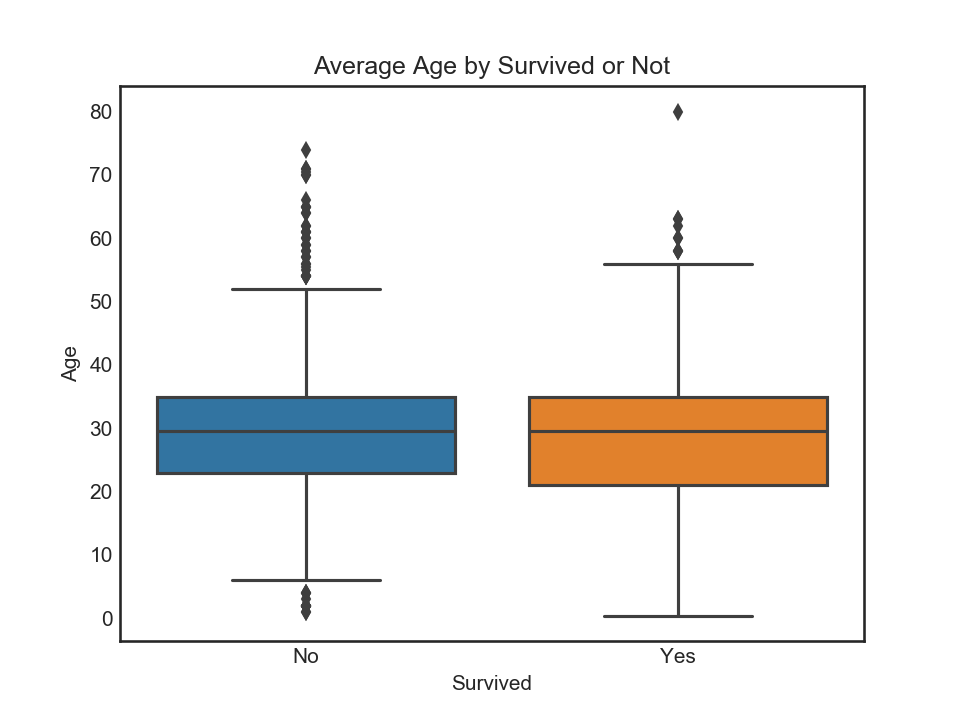

Text(0.5, 1.0, 'Average Age by Survived or Not')

In [32]:
plt.figure()
sns.boxplot(titanic_train.Survived,titanic_train.Age)
plt.xticks([0,1],['No','Yes'])
plt.title('Average Age by Survived or Not')

In [26]:
titanic_train = titanic_train.drop(['Age_Range','Ticket','Name','PassengerId'],axis=1)

titanic_train['Sex'] = titanic_train['Sex'].astype('category')

titanic_train['Sex'] = titanic_train.Sex.cat.codes

In [27]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [33]:
embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)
embarked.head(2)

,Q,S
0,0,1
1,0,0


In [34]:
titanic_train = pd.concat([titanic_train, embarked], axis=1)
titanic_train.drop('Embarked',inplace=True,axis=1)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [45]:
y = titanic_train.Survived.values

X = titanic_train.drop('Survived',axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.3)

c = [0.001,0.01,1,10]

for i in c:
    log_model = LogisticRegression(C=i,random_state=101)
    log_model.fit(X_train,y_train)
    print(f'C = {i} \n Accuracy: {round(log_model.score(X_test,y_test) *100)}')

log_model = LogisticRegression(C=1)

log_model.fit(X_train,y_train)

preds = log_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

C = 0.001 
 Accuracy: 69.0
C = 0.01 
 Accuracy: 71.0
C = 1 
 Accuracy: 81.0
C = 10 
 Accuracy: 82.0
[[147  16]
 [ 36  68]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [ ]:
mean_age = round((titanic_test.Age.mean()),1)

titanic_test['Age'] = titanic_test.Age.fillna(mean_age)

mean_fare = round(titanic_test.Fare.mean(),4)

titanic_test['Fare'] = titanic_test.Fare.fillna(mean_fare)

titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

titanic_test['Sex'] = titanic_test.Sex.astype('category')

titanic_test['Sex'] = titanic_test.Sex.cat.codes

embarked_test = pd.get_dummies(titanic_test['Embarked'],drop_first=True)

titanic_test = pd.concat([titanic_test, embarked_test],axis=1)

titanic_test = titanic_test.drop('Embarked',axis=1)


from sklearn.ensemble import RandomForestClassifier
leafs = [10,20,30,40,50,60,70,80,90,100]
estimators = [60,70,80,90,100,150,180,200]
for l in leafs:
    for e in estimators:
        ran_forest = RandomForestClassifier(n_estimators=e, max_leaf_nodes=l,random_state=101)
        ran_forest.fit(X_train,y_train)
        print(f'Estimators: {e}\nMax Leaf Nodes: {l}\nAccuracy:{round(ran_forest.score(X_test, y_test),3)*100}')

ran_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=80,random_state=101)
ran_forest.fit(X_train,y_train)
preds = ran_forest.predict(X_test)
print(confusion_matrix(y_test,preds),'/n',classification_report(y_test,preds))

'''X_train = titanic_train.drop('Survived',axis=1).values
y_train =  titanic_train.Survived.values
X_test = titanic_test.values
ran_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=80,random_state=101)
ran_forest.fit(X_train,y_train)
preds = ran_forest.predict(X_test)'''

In [ ]:
y_test

In [ ]:
el = {}
leafs = [10,20,30,40,50,60,70,80,90,100]
estimators = [60,70,80,90,100,150,180,200]
for l in leafs:
    for e in estimators:
        for x in range(0,8):
            ran_forest = RandomForestClassifier(n_estimators=e, max_leaf_nodes=l,random_state=101)
            ran_forest.fit(X_train,y_train)
            el.update({str(e):l})
            el.update({str(x):{ran_forest.score(X_test,y_test)}})

In [ ]:
el

In [ ]:
survived = pd.DataFrame(data=preds,index=titanic_test.PassengerId,columns=['Survived']).reset_index()

In [ ]:
survived.to_csv('Survived',index=False)

In [ ]:
titanic_test.info()

In [ ]:
titanic_train.info()

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.pairplot(titanic_train)